<h1> Vectorize Commit Messages </h1>

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('final.csv')

commits = df['commit_msg']

vectorizer = CountVectorizer()

BagOfWords = vectorizer.fit_transform(commits)

print(vectorizer.vocabulary_)


{'unknown': 8742, 'non': 7139, 'standard': 8303, 'attributes': 4450, 'may': 6920, 'be': 4541, 'read': 7675, 'via': 8906, 'user': 8824, 'defined': 5251, 'factory': 5658, 'objects': 7197, 'that': 8548, 'can': 4704, 'registered': 7755, 'with': 9014, 'the': 8549, 'attribute': 4449, 'addattributereader': 4242, 'method': 6964, 'git': 6059, 'svn': 8423, 'id': 6284, 'https': 6268, 'apache': 4352, 'org': 7272, 'repos': 7835, 'asf': 4396, 'jakarta': 6551, 'bcel': 4533, 'trunk': 8671, '152707': 1561, '13f79535': 1085, '47bb': 3579, '0310': 4, '9956': 4151, 'ffa450edef68': 5690, 'improved': 6344, 'comment': 4911, 'mainly': 6861, 'to': 8607, 'see': 8032, 'if': 6300, 'cvs': 5164, 'write': 9042, 'access': 4204, 'works': 9033, 'pr': 7472, 'obtained': 7201, 'from': 5873, 'submitted': 8384, 'by': 4674, 'reviewed': 7919, '152712': 1562, 'check': 4782, 'clazz': 4842, 'for': 5835, 'null': 7171, 'pointer': 7445, 'first': 5806, '152713': 1563, 'allow': 4291, 'lookup': 6820, 'through': 8578, 'getresourceasstr

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
df = pd.read_csv('final.csv')

# Select the features
vectorizer = CountVectorizer()
BagOfWords = vectorizer.fit_transform(commits)
X = BagOfWords
y = df['readability_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest classifier model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions on the testing set
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The model performance for testing set", "\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}", "\n")

# Investigate important features
feature_importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'importance': feature_importances})
print("The most important features are:", "\n")
print(feature_importances)

The model performance for testing set 

Accuracy: 0.7950079660116834
Precision: 0.6886075949367089
Recall: 0.508411214953271
F1 Score: 0.5849462365591398 

The most important features are: 

                                 feature    importance
0                                    000  5.898668e-06
1                                   0172  5.202438e-06
2                                  01772  1.062595e-05
3                                   0200  4.188516e-06
4                                   0310  1.075811e-03
...                                  ...           ...
9080                       zipfilesystem  9.893020e-05
9081               zipfilesystemprovider  4.972703e-07
9082                   zipfilesystemtest  2.035509e-05
9083  zipproviderwithcharsetnulltestcase  3.364139e-06
9084      zipproviderwithcharsettestcase  2.734426e-06

[9085 rows x 2 columns]


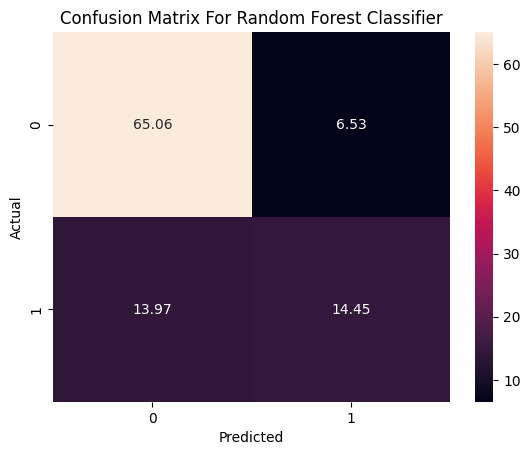

In [36]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
total_samples = cm.sum()

# Convert the confusion matrix to percentages
cm_percent = np.round((cm / total_samples) * 100, 2)

sns.heatmap(cm_percent, annot=True, fmt='.2f')    

plt.title('Confusion Matrix For Random Forest Classifier') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

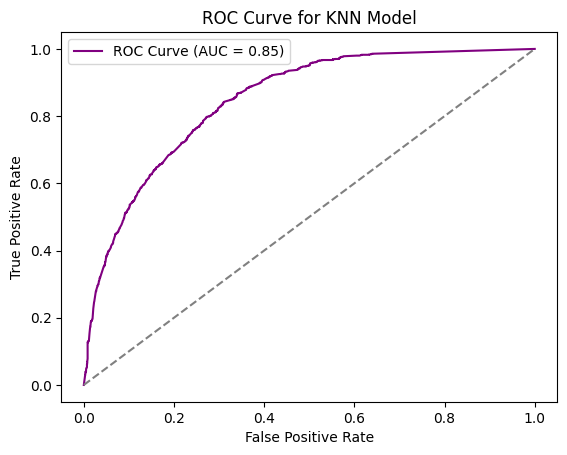

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Make predictions on the testing set
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='purple', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend()
plt.show()

<h1> Cross-Project</h1>

The model performance for testing set as cross-project: Codec-BCEL and VFS 

Accuracy: 0.717320553628268
Precision: 0.2753623188405797
Recall: 0.002413311317159914
F1 Score: 0.004784688995215311


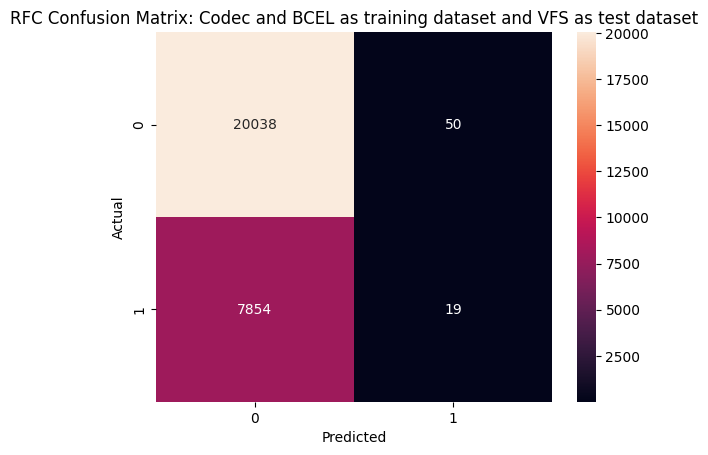

In [ ]:
# Train Dataset Codec + BCEL
# Test Dataset VFS


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
co = pd.read_csv('codecbcel.csv')
vf = pd.read_csv('vfs.csv')


# Split the data into training and testing sets
train = pd.concat([co[:140], vf[:140]])
test = pd.concat([co[140:], vf[140:]])

# Shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)

# Convert the continuous target variable into a binary one
train_labels = pd.cut(train['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
test_labels = pd.cut(test['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Vectorize the commit messages
vectorizer = CountVectorizer()
train_BagOfWords = vectorizer.fit_transform(train['commit_msg'])
test_BagOfWords = vectorizer.transform(test['commit_msg'])

# Train the random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_BagOfWords, train_labels)

# Test the model
predictions = rfc.predict(test_BagOfWords)
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

print("The model performance for testing set as cross-project: Codec-BCEL and VFS", "\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

#Confusion Matrix

from sklearn.metrics import confusion_matrix    
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('RFC Confusion Matrix: Codec and BCEL as training dataset and VFS as test dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





The model performance for testing set as cross-project: Codec-VFS and BCEL 

Accuracy: 0.7166410357283359
Precision: 0.3076923076923077
Recall: 0.0010109945659042083
F1 Score: 0.002015367174707142


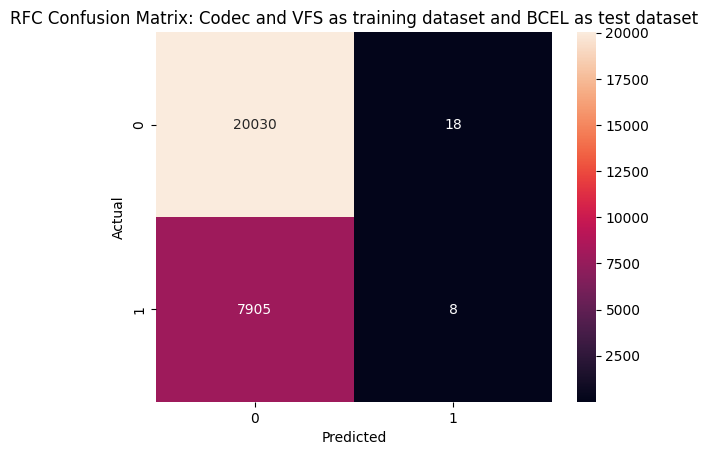

In [ ]:
# Train Dataset Codec + VFS
# Test Dataset BCEL

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
co = pd.read_csv('codecvfs.csv')
bc = pd.read_csv('bcel.csv')

# Split the data into training and testing sets
train = pd.concat([co[:140], bc[:140]])
test = pd.concat([co[140:], bc[140:]])

# Shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)

# Convert the continuous target variable into a binary one
train_labels = pd.cut(train['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
test_labels = pd.cut(test['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Vectorize the commit messages
vectorizer = CountVectorizer()
train_BagOfWords = vectorizer.fit_transform(train['commit_msg'])
test_BagOfWords = vectorizer.transform(test['commit_msg'])

# Train the random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_BagOfWords, train_labels)

# Test the model
predictions = rfc.predict(test_BagOfWords)
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

print("The model performance for testing set as cross-project: Codec-VFS and BCEL", "\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('RFC Confusion Matrix: Codec and VFS as training dataset and BCEL as test dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



The model performance for testing set as cross-project: BCEL-VFS and Codec 

Accuracy: 0.7176424305282357
Precision: 0.7647058823529411
Recall: 0.0032857323391886767
F1 Score: 0.006543349691707561


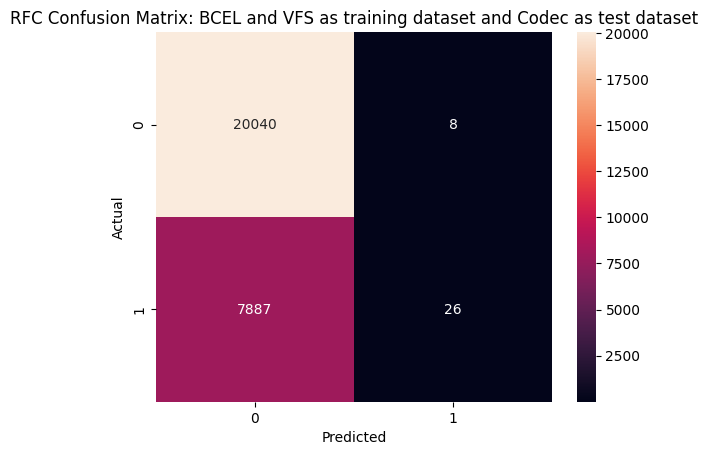

In [ ]:
# Train Dataset BCEL + VFS
# Test Dataset Codec

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
bc = pd.read_csv('bcelvfs.csv')
co = pd.read_csv('codec.csv')

# Split the data into training and testing sets
train = pd.concat([bc[:140], co[:140]])
test = pd.concat([bc[140:], co[140:]])

# Shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)

# Convert the continuous target variable into a binary one
train_labels = pd.cut(train['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
test_labels = pd.cut(test['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Vectorize the commit messages
vectorizer = CountVectorizer()
train_BagOfWords = vectorizer.fit_transform(train['commit_msg'])
test_BagOfWords = vectorizer.transform(test['commit_msg'])

# Train the random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_BagOfWords, train_labels)

# Test the model
predictions = rfc.predict(test_BagOfWords)
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

print("The model performance for testing set as cross-project: BCEL-VFS and Codec", "\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('RFC Confusion Matrix: BCEL and VFS as training dataset and Codec as test dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



<h1> Within Project</h1>

The model performance for testing set as within-project: Codec, BCEL and VFS 

Accuracy: 0.771491957848031
Precision: 0.5899280575539568
Recall: 0.4320337197049526
F1 Score: 0.49878345498783455


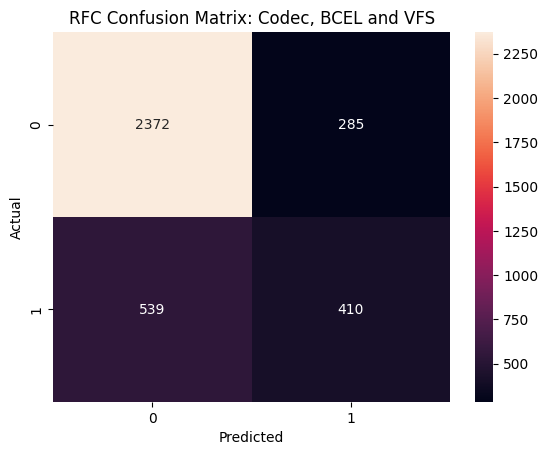

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
cd = pd.read_csv('combined_data.csv')



# Shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)

# Convert the continuous target variable into a binary one
train_labels = pd.cut(train['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])
test_labels = pd.cut(test['readability_status'], bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Vectorize the commit messages
vectorizer = CountVectorizer()
train_BagOfWords = vectorizer.fit_transform(train['commit_msg'])
test_BagOfWords = vectorizer.transform(test['commit_msg'])

# Train the random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_BagOfWords, train_labels)

# Test the model
predictions = rfc.predict(test_BagOfWords)
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

print("The model performance for testing set as within-project: Codec, BCEL and VFS", "\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('RFC Confusion Matrix: Codec, BCEL and VFS')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


